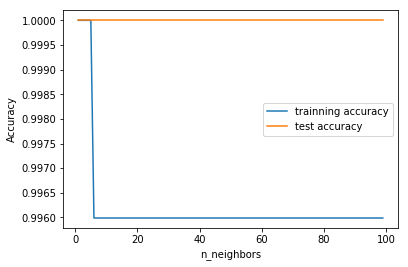

In [38]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
import mglearn


##-------------load data method----------##
def load_dataframe(path):
    data_frame = pd.read_csv(path)
    return data_frame
##------------------------------##
neighbors_settings = range(1,100)
test_score = []
train_score = []
trainning_accuracy = []
test_accuracy = []

df = load_dataframe('sample.csv')
df.drop(['No.','Time','Source','Destination'], axis=1, inplace = True) ##drop unnecessary features
##------------- Handle patterned texts---------##
encoder = LabelEncoder()
df_protocol = df['Protocol']
df['Protocol'] = encoder.fit_transform(df_protocol)
##--------------------------------------------##

##cv = CountVectorizer()
##info = cv.fit_transform(df['Info'].values)
##df['Info'] = info
df.drop('Info', axis=1, inplace = True)

#----------Make targer list---------##
target_list = []
for i in range(0,499):
    target_list.append(0)
for i in range(0,499):
    target_list.append(1)

target = np.array(target_list)
##--------------------------------##

x_train, x_test, y_train, y_test = train_test_split(df.values, target, stratify=target)
#x_test.shape
for n_neighbors in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(x_train, y_train)
    #record trainning set accuracy
    trainning_accuracy.append(knn.score(x_train, y_train))
    #record test set accuracy
    test_accuracy.append(knn.score(x_test, y_test))
    
plt.plot(neighbors_settings, trainning_accuracy, label="trainning accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig("Train_Test_Accuracy_till_100.png")

    
# test_data = load_dataframe('input.csv')
# test_data.drop(['No.','Time','Source','Destination', 'Info'], axis=1, inplace = True) ##drop unnecessary features
# encoder_1 = LabelEncoder()
# df_protocol_1 = test_data['Protocol']
# test_data['Protocol'] = encoder_1.fit_transform(df_protocol_1)
# test_data_arr = test_data.values
# x_new = []
# for i in range (500):
#     x_new.append([test_data_arr[i]])

# x_new = np.array([[10,500]])
# prediction = knn.predict(x_new)
# print (x_new)
# if(prediction == 0):
#     print("DOS")
# elif (prediction == 1):
#     print("Normal")

# for i in range (500):
#     prediction = knn.predict(x_new[i])
#     print (x_new[i])
#     if(prediction == 0):
#         print("DOS")
#     elif (prediction == 1):
#         print("Normal")



##-----------------------Decesion Area Plot----------------------##    
# clf = KNeighborsClassifier(n_neighbors=4).fit(X_train, y_train)
# mglearn.plots.plot_2d_separator(clf,X_train, fill=True, eps=0.5, alpha = 0.4)
# mglearn.discrete_scatter(X_train[:,0],X_train[:,1], y_train)
# plt.xlabel("Protocol")
# plt.ylabel("Packet Length")
# plt.title("Neighbors = 4 decision Boundary")
# plt.legend(["DOS","Normal"])
# plt.savefig("Neighbors_4_decision_boundary.png")
# ##----------------------------------------------------------------##